In [1]:
import tensorflow as tf #importing Tensorflow

Loading MNIST data

In [2]:
mnist = tf.keras.datasets.mnist

Dividing dataset into training and testing sets

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


Data Preprocessing

In [4]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

In [5]:
import matplotlib.pyplot as plt

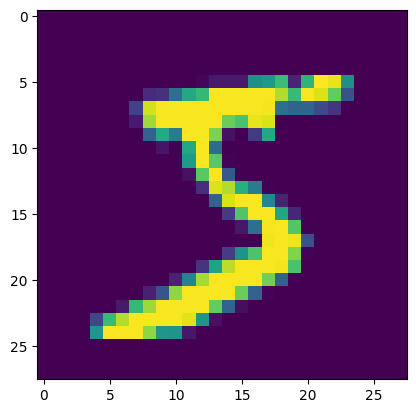

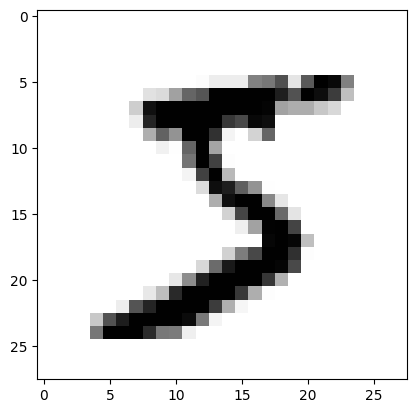

In [6]:
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[0], cmap=plt.cm.binary)


In [ ]:
print(X_train[0])

Normalizing the data

In [7]:
X_train = tf.keras.utils.normalize(X_train,axis = 1)
X_test = tf.keras.utils.normalize(X_train,axis = 1)

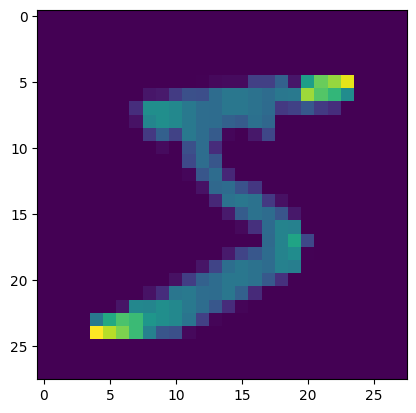

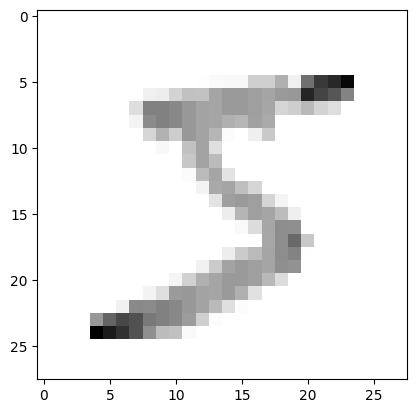

In [8]:
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[0], cmap=plt.cm.binary)

Resizing the image

In [9]:
import numpy as np

In [10]:
#Resizing the images to the 28x28(784 pixels)
IMG_SIZE=28
X_trainr = np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_testr = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [11]:
X_trainr.shape , X_testr.shape

((60000, 28, 28, 1), (60000, 28, 28, 1))

Ceating Deep Learning Architecture

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [13]:
model = Sequential() ##Creating Neural Network

##First Convolution layer
model.add(Conv2D(64, (3,3), input_shape = X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##Second Convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##Third Convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##Fully Connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

##Fully Connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

##Last Connected layer
model.add(Dense(10))
model.add(Activation('softmax'))



In [ ]:
model.summary()

In [14]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam", metrics=['accuracy'])

In [15]:
model.fit(X_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 38s 28ms/step - loss: 0.3364 - accuracy: 0.8943 - val_loss: 0.1186 - val_accuracy: 0.9636
Epoch 2/5
1313/1313 [==============================] - 41s 32ms/step - loss: 0.1104 - accuracy: 0.9660 - val_loss: 0.1016 - val_accuracy: 0.9691
Epoch 3/5
1313/1313 [==============================] - 36s 27ms/step - loss: 0.0790 - accuracy: 0.9754 - val_loss: 0.0974 - val_accuracy: 0.9713
Epoch 4/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0607 - accuracy: 0.9815 - val_loss: 0.0715 - val_accuracy: 0.9780
Epoch 5/5
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0503 - accuracy: 0.9847 - val_loss: 0.0851 - val_accuracy: 0.9749


Testing the model on test data

In [16]:
IMG_SIZE=28
X_testr = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [ ]:
#Evaluating on testing set
test_loss, test_acc = model.evaluate(X_testr, y_test)

In [18]:
predictions = model.predict([X_testr]) ## Predictions of the test data

1875/1875 [==============================] - 12s 6ms/step


In [19]:
print(predictions) #printing the predictions on test data

[[2.79744683e-07 1.12239559e-06 4.13933719e-07 ... 4.52706945e-06
  7.68995844e-04 8.96020065e-05]
 [9.99877572e-01 1.20884374e-06 1.98585394e-06 ... 3.44031696e-06
  1.51195337e-07 8.40537177e-05]
 [2.14274909e-08 6.40505532e-05 6.01518435e-09 ... 1.47746869e-06
  1.99398844e-08 4.26539017e-08]
 ...
 [2.58529985e-06 3.80436154e-06 5.99376904e-07 ... 3.24849293e-06
  2.26249639e-03 1.71441620e-03]
 [2.95013451e-04 1.54675527e-05 4.59973535e-06 ... 5.97470898e-06
  7.62907366e-05 5.07435834e-05]
 [5.27648899e-06 1.17434233e-07 1.13563665e-05 ... 1.28403753e-05
  9.97488856e-01 2.47750222e-03]]


In [20]:
print(np.argmax(predictions[0]))

5


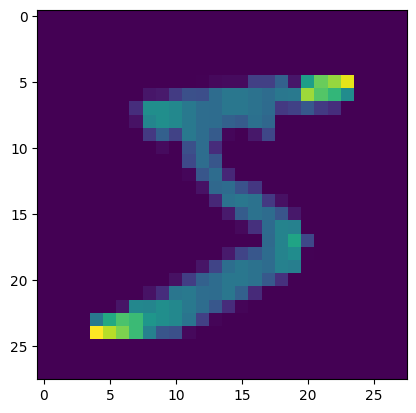

In [21]:
plt.imshow(X_test[0])

In [22]:
print(np.argmax(predictions[465]))

6


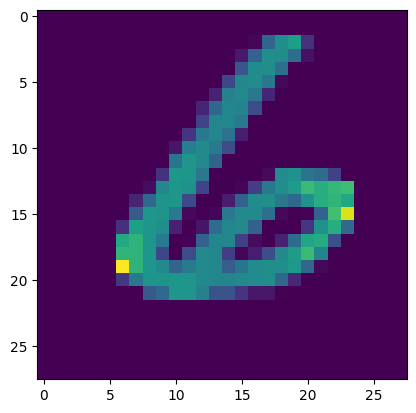

In [23]:
plt.imshow(X_test[465])

Testing with hand drawn digit

In [ ]:
import pickle
pickle.dump(model, open('digitrecognizer.pkl','wb'))

In [2]:
import pickle
model = pickle.load(open('digitrecognizer.pkl', 'rb')) #using the saved model for predicting new handdrawn digit

Saving the model using pickle

In [6]:
import cv2 #importing OpenCV2
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np

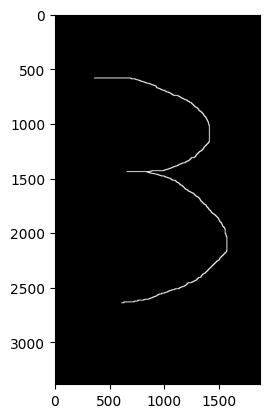

1/1 [==============================] - 0s 27ms/step
The predicted value is :  3


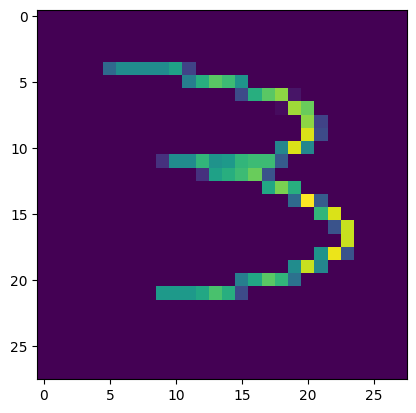

In [9]:
#uploading a hand drawn image and resizing it to test in the model
img  = cv2.imread('test.png')
plt.imshow(img)
plt.show()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)
plt.imshow(resized)

newimg = tf.keras.utils.normalize(resized,axis=1)
newimg = np.array(newimg).reshape(-1,28,28,1)

predictions = model.predict(newimg) #predicting the hand drawn digit using model
print("The predicted value is : ",np.argmax(predictions))